## Capstone Project-1 Milestone Project

In this step of the project, the data cleaning and data wrangling steps will be explained, and some visualizations will be provided. Also, the statistcal data analysis will be provided. However, machine learning techniques will be left to the next stage of the project.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the csv file: Accident_Data
df = pd.read_csv('C:\\Users\Servet\Desktop\Project1 Files\Accidents.csv')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201,3,2/8/2016 5:46,2/8/2016 11:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201,2,2/8/2016 6:07,2/8/2016 6:37,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201,2,2/8/2016 6:49,2/8/2016 7:19,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201,3,2/8/2016 7:23,2/8/2016 7:53,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201,2,2/8/2016 7:39,2/8/2016 8:09,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
# Get some summary details about the Data Frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 49 columns):
ID                       1048575 non-null object
Source                   1048575 non-null object
TMC                      1048575 non-null int64
Severity                 1048575 non-null int64
Start_Time               1048575 non-null object
End_Time                 1048575 non-null object
Start_Lat                1048575 non-null float64
Start_Lng                1048575 non-null float64
End_Lat                  0 non-null float64
End_Lng                  0 non-null float64
Distance(mi)             1048575 non-null float64
Description              1048574 non-null object
Number                   396803 non-null float64
Street                   1048575 non-null object
Side                     1048575 non-null object
City                     1048548 non-null object
County                   1048575 non-null object
State                    1048575 non-null object
Zipcode       

We observe that, some columns have missing values and two columns have no values. We will firstly focus on filling the missing values.

In [4]:
#Since there are no information in two columns, we will drop them
df = df.drop(columns = ['End_Lat', 'End_Lng'])
print('The DataFrame has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The DataFrame has 1048575 rows and 47 columns


In [5]:
# Let's check the total missing values in each entry
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_list = missing_values[missing_values>=1]
missing_values_list

Precipitation(in)        927055
Wind_Chill(F)            875145
Number                   651772
Wind_Speed(mph)          207628
Visibility(mi)            28973
Weather_Condition         28951
Humidity(%)               25111
Temperature(F)            24059
Pressure(in)              21069
Wind_Direction            17639
Weather_Timestamp         17631
Airport_Code              10290
Timezone                    581
Zipcode                     140
Nautical_Twilight            29
Astronomical_Twilight        29
Civil_Twilight               29
Sunrise_Sunset               29
City                         27
Description                   1
dtype: int64

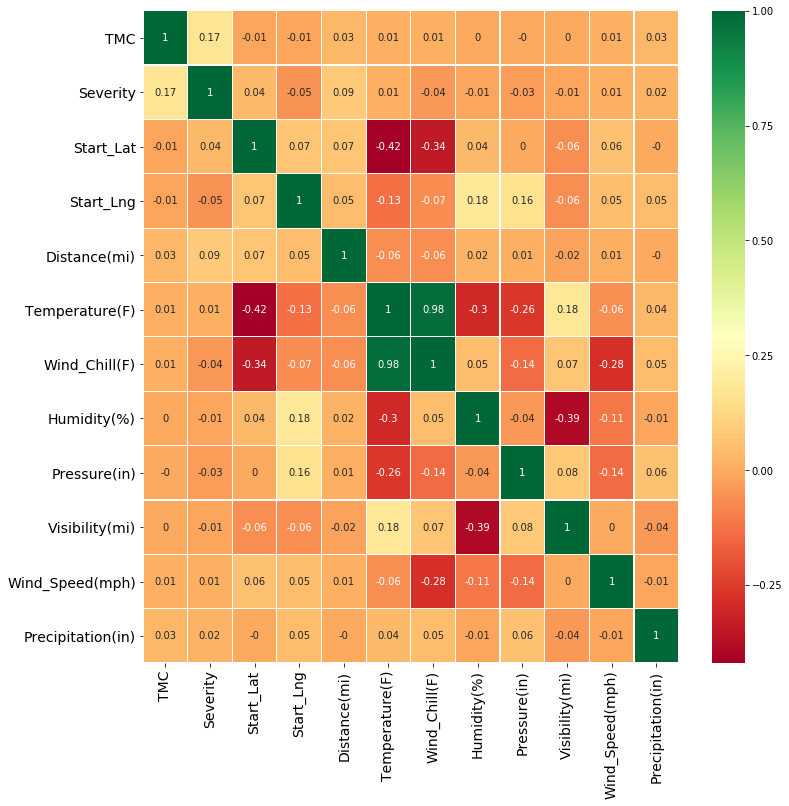

In [6]:
# Now we will make a HeatMap by using Seaborn Library
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
# Seaborn Heatmap cuts the top and bottom rows to half,to fix the error, y_lims are changed
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [7]:
# When and humidity, precipitation,Visibility, Pressure(in), and wind speed values are missing, we will fill those missing cells with the mean values of the correspomding column.
df['Precipitation_isnull'] = df['Precipitation(in)'].isnull().astype(int)
df['Precipitation(in)']=df['Precipitation(in)'].fillna(df['Precipitation(in)'].mean())
df['Humidity_isnull'] = df['Humidity(%)'].isnull().astype(int)
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].mean())
df['Wind_Speed_isnull'] = df['Wind_Speed(mph)'].isnull().astype(int)
df['Wind_Speed(mph)'] = df['Wind_Speed(mph)'].fillna(df['Wind_Speed(mph)'].mean())
df['Pressure_isnull'] = df['Pressure(in)'].isnull().astype(int)
df['Pressure(in)'] = df['Pressure(in)'].fillna(df['Pressure(in)'].mean())
df['Visibility(mi)_isnull'] = df['Visibility(mi)'].isnull().astype(int)
df['Visibility(mi)'] = df['Visibility(mi)'].fillna(df['Visibility(mi)'].mean())

In [8]:
# Temperature(F)  column can be filled with average Temperature for that state
df['Temperature_isnull'] = df['Temperature(F)'].isnull().astype(int)
df['Temperature(F)'] = df.groupby('State')['Temperature(F)'].transform(lambda grp: grp.fillna(grp.mean()))


In [9]:
# Since there is a very strong correlation between Temperature(F) and Wind_Chill(F), the missing values on Windchill can be filled by the linear model derived from Temperatur

temp = df['Temperature(F)']
wind= df['Wind_Chill(F)']

def estimate_coef(temp, wind): 
    # number of observations/points 
    n = np.size(temp) 
  
    # mean of x and y vector 
    m_temp, m_wind = np.mean(temp), np.mean(wind) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(wind*temp) - n*m_wind*m_temp 
    SS_xx = np.sum(temp*temp) - n*m_temp*m_temp 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_wind - b_1*m_temp 
  
    return(b_0, b_1) 

In [10]:
estimate_matrix = np.array(estimate_coef(temp,wind))
estimate_matrix

array([286.26673783,  -4.188633  ])

In [11]:
# We will fill the 'Wind_Chill(F)' values by corresponding Temperatures.
df['Windchill_isnull'] = df['Wind_Chill(F)'].isnull().astype(int)
df['Wind_Chill(F)'] = df['Wind_Chill(F)'].fillna(estimate_matrix[0]+estimate_matrix[1]*df['Temperature(F)'])

In [12]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_list = missing_values[missing_values>=1]
missing_values_list

Number                   651772
Weather_Condition         28951
Wind_Direction            17639
Weather_Timestamp         17631
Airport_Code              10290
Timezone                    581
Zipcode                     140
Astronomical_Twilight        29
Nautical_Twilight            29
Civil_Twilight               29
Sunrise_Sunset               29
City                         27
Description                   1
dtype: int64

In [13]:
# We will fill the Weather Condition, Description and City by 'NaN'
df['Weather_isnull'] = df['Weather_Condition'].isnull().astype(int)
df['Weather_Condition'] = df['Weather_Condition'].fillna('NaN')
df['Description_isnull'] = df['Description'].isnull().astype(int)
df['Description'] = df['Description'].fillna('Accident')
df['City_isnull'] = df['City'].isnull().astype(int)
df['City'] = df['City'].fillna('NaN')
df['Wind_Direction_isnull'] = df['Wind_Direction'].isnull().astype(int)
df['Wind_Direction'] = df['Wind_Direction'].fillna('NaN')

In [14]:
# We will fill the 'Timezone', 'Zipcode' and 'Airport_Code' columns by the most common time zones in that  State
df['Timezone_isnull']= df['Timezone'].isnull().astype(int)
df['Timezone'] = df.groupby('State')['Timezone'].transform(lambda tz: tz.fillna(tz.value_counts().index[0]))
df['Zipcode_isnull'] = df['Zipcode'].isnull().astype(int)
df['Zipcode'] = df.groupby('State')['Zipcode'].transform(lambda zc: zc.fillna(zc.value_counts().index[0]))
df['Airport_Code_isnull'] = df['Airport_Code'].isnull().astype(int)
df['Airport_Code'] = df.groupby('State')['Airport_Code'].transform(lambda ac: ac.fillna(ac.value_counts().index[0]))

In [15]:
# Convert Start_Time and End_Time to datetypes
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Extract year, month, day, hour and weekday
df['Year']=df['Start_Time'].dt.year
df['Month']=df['Start_Time'].dt.strftime('%b')
df['Day']=df['Start_Time'].dt.day
df['Hour']=df['Start_Time'].dt.hour
df['Weekday']=df['Start_Time'].dt.strftime('%a')

In [16]:
missing_df = pd.concat([missing_values,df[missing_values.index].dtypes], axis=1, keys=['Total','Data Types'],sort=False)
missing_df[missing_df['Total']>=1]

,Total,Data Types
Number,651772,float64
Weather_Condition,28951,object
Wind_Direction,17639,object
Weather_Timestamp,17631,object
Airport_Code,10290,object
Timezone,581,object
Zipcode,140,object
Astronomical_Twilight,29,object
Nautical_Twilight,29,object
Civil_Twilight,29,object


In [17]:
missing_copy = missing_df[missing_df['Total']>=1].copy()
object_column = missing_copy[missing_copy['Data Types']=='object'].index
df[object_column].head()

,Weather_Condition,Wind_Direction,Weather_Timestamp,Airport_Code,Timezone,Zipcode,Astronomical_Twilight,Nautical_Twilight,Civil_Twilight,Sunrise_Sunset,City,Description
0,Light Rain,Calm,2/8/2016 5:58,KFFO,US/Eastern,45424,Night,Night,Night,Night,Dayton,Right lane blocked due to accident on I-70 Eas...
1,Light Rain,Calm,2/8/2016 5:51,KCMH,US/Eastern,43068-3402,Day,Night,Night,Night,Reynoldsburg,Accident on Brice Rd at Tussing Rd. Expect del...
2,Overcast,SW,2/8/2016 6:56,KI69,US/Eastern,45176,Day,Day,Night,Night,Williamsburg,Accident on OH-32 State Route 32 Westbound at ...
3,Mostly Cloudy,SW,2/8/2016 7:38,KDAY,US/Eastern,45417,Day,Day,Day,Night,Dayton,Accident on I-75 Southbound at Exits 52 52B US...
4,Mostly Cloudy,SW,2/8/2016 7:53,KMGY,US/Eastern,45459,Day,Day,Day,Day,Dayton,Accident on McEwen Rd at OH-725 Miamisburg Cen...


In [18]:
# We will fill "Day' and 'Night' according to the Start Time. We will define a function: Filler and pass those columns into the function
def filler(df,columns):
    # get list comprising column missing data
    lst = df[df[columns].isna()].index
    for i in lst:
        if 6<= df.loc[i,'Start_Time'].hour and df.loc[i,'Start_Time'].hour <18:
            df[columns] = df[columns].fillna('Day')
        else:
            df[columns] = df[columns].fillna('Night')


filler(df,'Nautical_Twilight')
filler(df,'Sunrise_Sunset')
filler(df,'Civil_Twilight')
filler(df,'Astronomical_Twilight')

In [19]:
# We will fill make new colums with Booleans 
df['Nautical_Twilight_isnull'] = df['Nautical_Twilight'].isnull().astype(int)
df['Sunrise_Sunset_isnull'] = df['Sunrise_Sunset'].isnull().astype(int)
df['Civil_Twilight_isnull'] = df['Civil_Twilight'].isnull().astype(int)
df['Astronomical_Twilight_isnull'] = df['Astronomical_Twilight'].isnull().astype(int)

In [20]:
# We will fill Weather Timestamp with Start_Time
df['Weather_Timestamp_isnull'] = df['Weather_Timestamp'].isnull().astype(int)
df['Weather_Timestamp'] = df['Weather_Timestamp'].fillna(df['Start_Time'])

In [21]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_list = missing_values[missing_values>=1]
missing_values_list

Number    651772
dtype: int64

In [22]:
#We fill each missing number by the average number on each zipcode
df['Number_isnull'] = df['Number'].isnull().astype(int)
df['Number'] = df.groupby('Zipcode')['Number'].transform(lambda nmbr: nmbr.fillna(nmbr.mean()))

In [23]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_list = missing_values[missing_values>=1]
missing_values_list

Number    87768
dtype: int64

There are still some missing values, due to the no street number recorded in some zipcodes. So we can use the same grouping process with average number on state.

In [24]:
df['Number'] = df.groupby('State')['Number'].transform(lambda nmbr: nmbr.fillna(nmbr.mean()))

In [25]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_list = missing_values[missing_values>=1]
missing_values_list

Number    5
dtype: int64

In [26]:
# Now only 5 numbers are left, and we will fill with those 5 with mean
df['Number']  = df['Number'] .fillna(df['Number'] .mean())

In [27]:
# Let's check the total missing values once again
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_values_list = missing_values[missing_values>=1]
missing_values_list

Series([], dtype: int64)

Finally, we fill all the missing values, and now we can get some information about the Data Frame

In [28]:
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,...,Month,Day,Hour,Weekday,Nautical_Twilight_isnull,Sunrise_Sunset_isnull,Civil_Twilight_isnull,Astronomical_Twilight_isnull,Weather_Timestamp_isnull,Number_isnull
0,A-1,MapQuest,201,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,...,Feb,8,5,Mon,0,0,0,0,0,1
1,A-2,MapQuest,201,2,2016-02-08 06:07:00,2016-02-08 06:37:00,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,...,Feb,8,6,Mon,0,0,0,0,0,0
2,A-3,MapQuest,201,2,2016-02-08 06:49:00,2016-02-08 07:19:00,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,...,Feb,8,6,Mon,0,0,0,0,0,1
3,A-4,MapQuest,201,3,2016-02-08 07:23:00,2016-02-08 07:53:00,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,...,Feb,8,7,Mon,0,0,0,0,0,1
4,A-5,MapQuest,201,2,2016-02-08 07:39:00,2016-02-08 08:09:00,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,...,Feb,8,7,Mon,0,0,0,0,0,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 72 columns):
ID                              1048575 non-null object
Source                          1048575 non-null object
TMC                             1048575 non-null int64
Severity                        1048575 non-null int64
Start_Time                      1048575 non-null datetime64[ns]
End_Time                        1048575 non-null datetime64[ns]
Start_Lat                       1048575 non-null float64
Start_Lng                       1048575 non-null float64
Distance(mi)                    1048575 non-null float64
Description                     1048575 non-null object
Number                          1048575 non-null float64
Street                          1048575 non-null object
Side                            1048575 non-null object
City                            1048575 non-null object
County                          1048575 non-null object
State                        

In [30]:
# Now, we will convert the first cleaned version to a csv:
df.to_csv('US_Accidents_cleaned1.csv')

### 1. What is the correlation between numerical variables and severity

Firstly we will check how the distribution of the severity

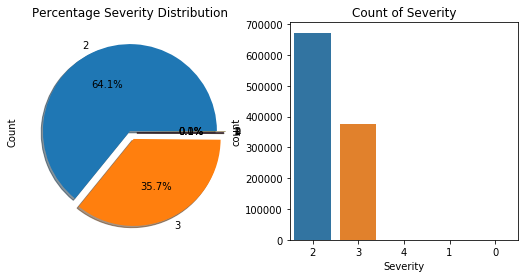

In [31]:
# Percent of severity
f,ax=plt.subplots(1,2,figsize=(9,4))
df['Severity'].value_counts().plot.pie(explode=[0,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Percentage Severity Distribution')
ax[0].set_ylabel('Count')
sns.countplot('Severity',data=df,ax=ax[1],order=df['Severity'].value_counts().index)
ax[1].set_title('Count of Severity')
plt.show()

This distribution suggest that the majority of the severities of accidents are labeled as 2 or 3.

We can perform a heatmap to check which of the "float64" and "int64"(not dummy variables) columns are correlated with the severity the most.

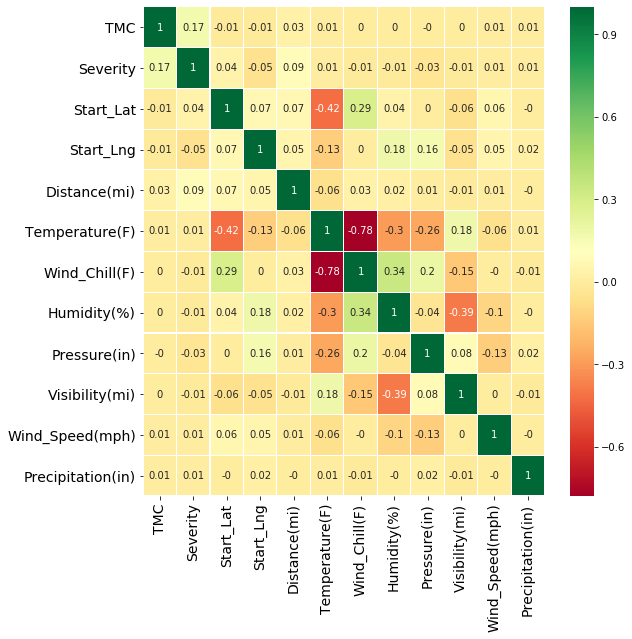

In [32]:
# Now we will make a HeatMap by using Seaborn Library
fig=sns.heatmap(df[['TMC','Severity','Start_Lat','Start_Lng','Distance(mi)','Temperature(F)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']].corr().round(2),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
# Seaborn Heatmap cuts the top and bottom rows to half,to fix the error, y_lims are changed
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
fig=plt.gcf()
fig.set_size_inches(9,9)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

This heatmap does not suggest any strong correlation between a numerical variable and severity of an accident.

### 2. What is the relationship between location and the severity of accidents?

The second question is how the number and severity of accidents are associated with the location. The first graph we used to see the number of accidents for each state:

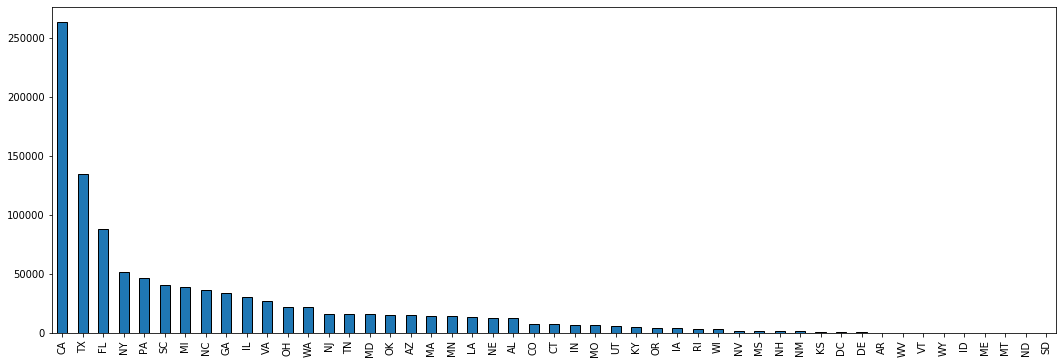

In [33]:
# Firstly, we will check the distribution of the accidents ove the states
plt.figure(figsize=(18,6))
df['State'].value_counts().plot(kind='bar', edgecolor = 'k')

We can observe from this graph that the number of accidents significantly differ from state to state. However, the other part of the question is whether the severity of an accident is associated with the state or not. In order to answer this question, we will check the distribution of the severities of the accidents in 10 states with the highest number of accidents.

In [34]:
# We will find 10 states with the highest number of accidents:
df.State.value_counts().head(10)

CA    262792
TX    134798
FL     87834
NY     51447
PA     46897
SC     40692
MI     39175
NC     36314
GA     33844
IL     30097
Name: State, dtype: int64

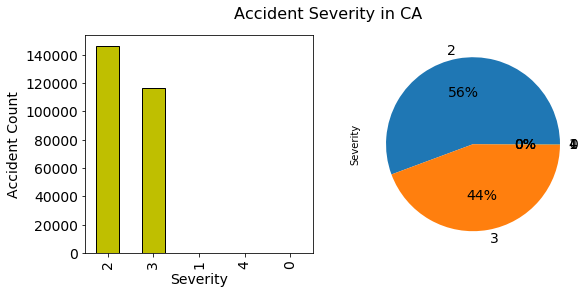

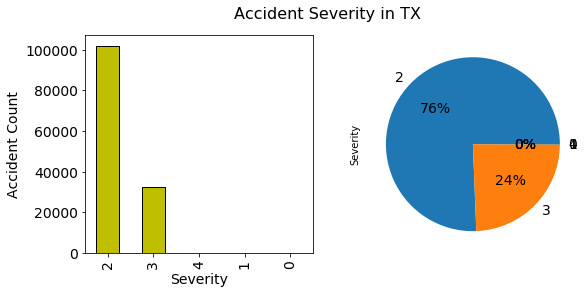

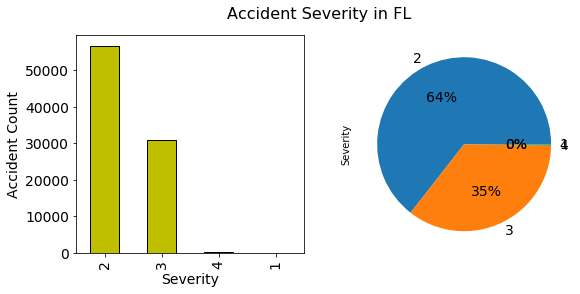

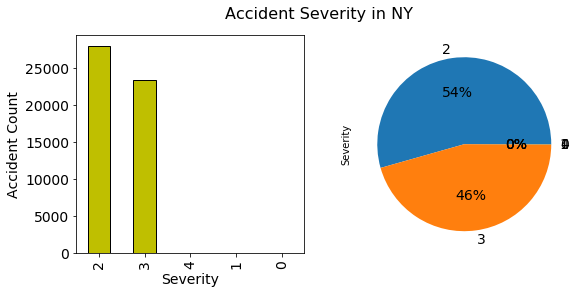

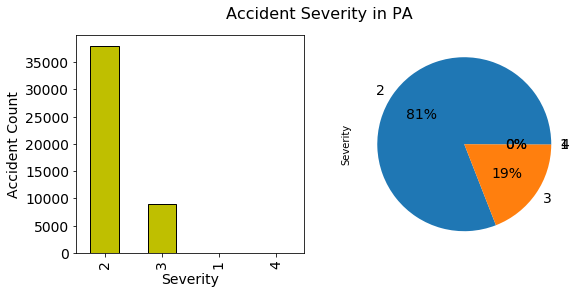

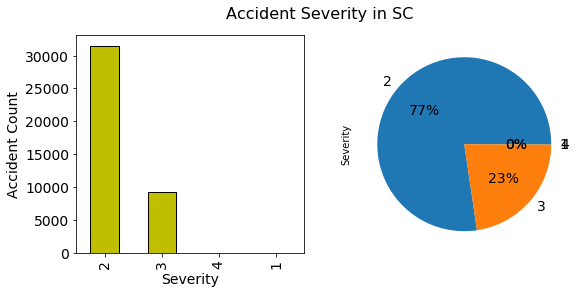

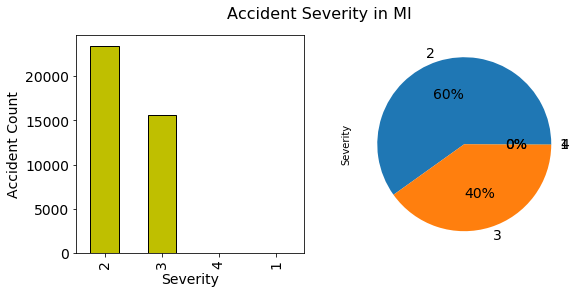

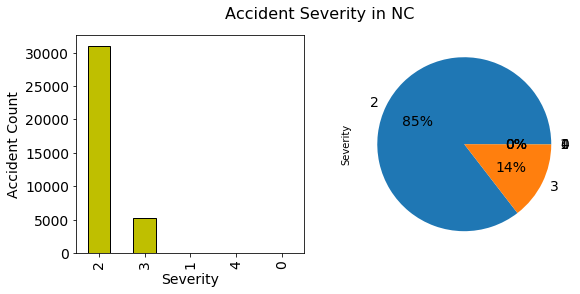

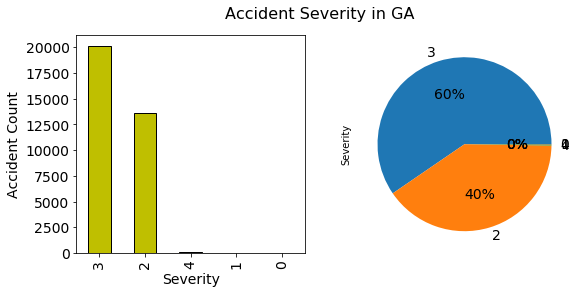

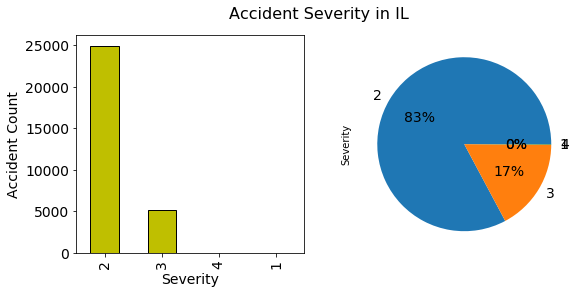

In [35]:
# We will draw pieplots and barplots for the distributions of severities in each of these 10 states.
# We will perform a for loop to choose the date for these states
for s in ["CA","TX", "FL","NY","PA","SC", "MI","NC","GA","IL"]:
    plt.subplots(1,2,figsize=(9,4))
    plt.suptitle('Accident Severity in ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=14)
    plt.ylabel('Accident Count',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.subplot(1,2,2)
    df.loc[df["State"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=14)

These graphs clearly state that the severity distribution differs from state to state. So state is a variable that may affect the severity of an accident.

Severity is a discrete numerical variable in ordinal level, so mean severity my have meaning in the context:

In [36]:
# We will define the top severity state by getting the mean of the severities of each states
df_top_Severity_State = df.groupby('State').agg({'Severity': 'mean'}).sort_values('Severity').reset_index()

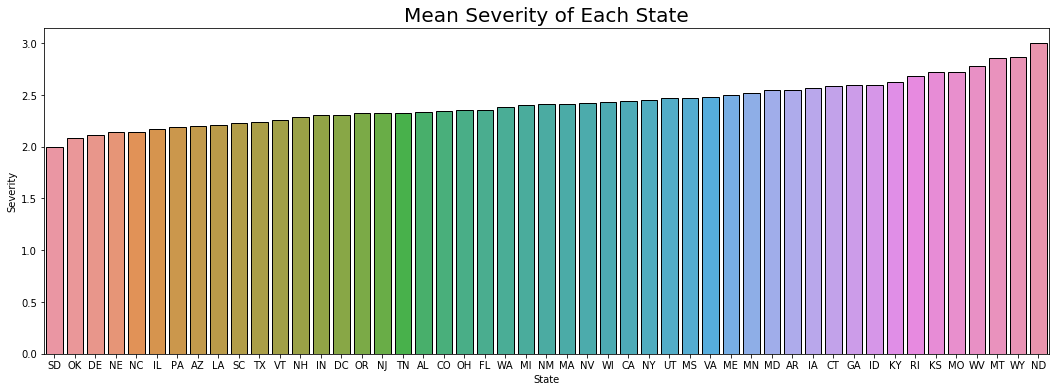

In [37]:
# Now we can show the mean severities of each state on a bar graph
plt.figure(figsize=(18,6))
sns.barplot(y="Severity", x="State", data=df_top_Severity_State,edgecolor='k')
plt.title("Mean Severity of Each State", fontsize=20)
plt.show()

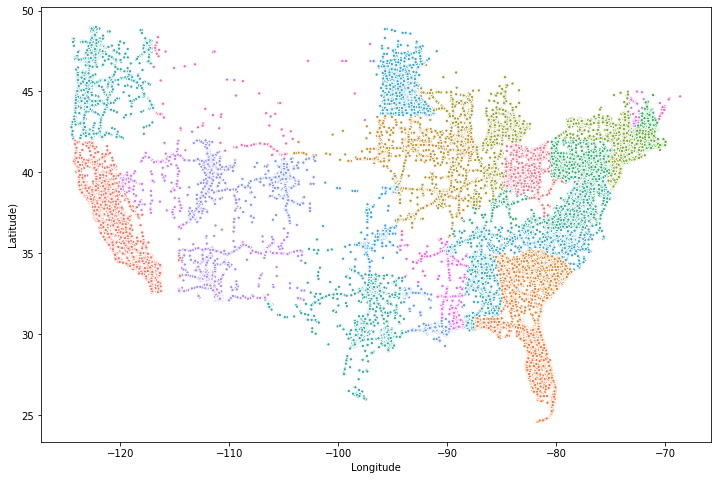

In [38]:
# Let'scheck the accident data on a map by coloring each state with a different color
plt.figure(figsize=(12,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='State', data=df, s=10, legend = False)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.show()

Even though this graph can shows the distribution of the accidents in each state, it does not clearly shows the clusters.

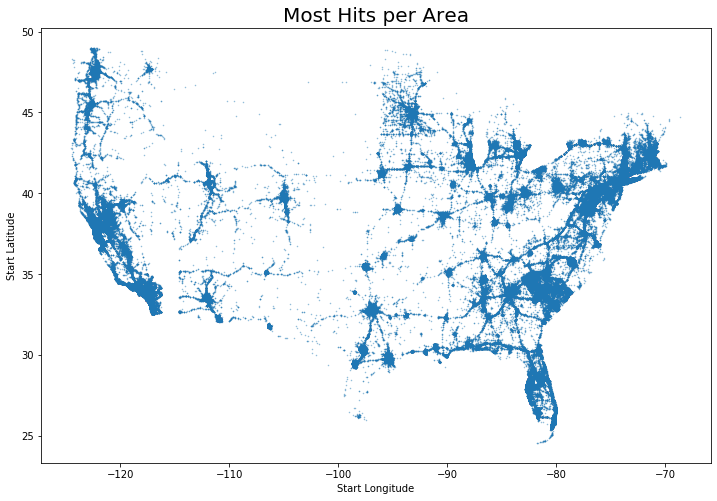

In [39]:
# If we remove 'hue'=State, we can observe which areas and which roads have more accidents than the others
plt.figure(figsize=(12,8))
plt.title('Most Hits per Area', fontsize=20)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.plot(df.Start_Lng, df.Start_Lat, ".", alpha=0.5, ms=1)
plt.show()

The graph above shows all the accidents in the USA, and we can easily see that the accidents are clustered in metropolitan areas and major highways. However, it does not indicate the severity of accidents.

In order to show the severity of an accident, we choose the State of Texas to see how more severe accidents are clustered:

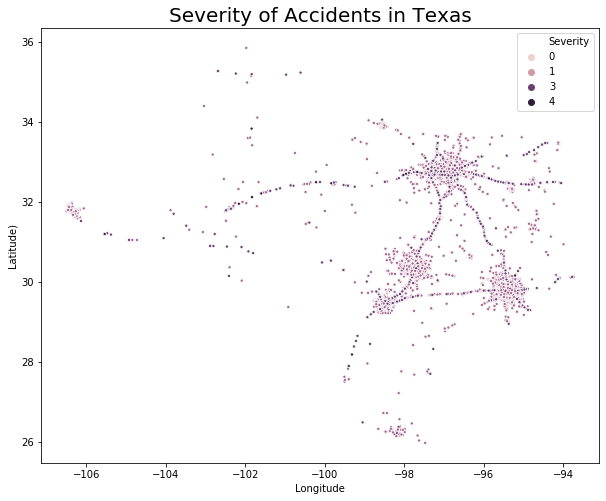

In [40]:
# Here we can see the map of the severity of the accidents in Texas colorcoded with the severity of the accidents
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='Severity', data=df.loc[df.State=='TX'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.title('Severity of Accidents in Texas', fontsize=20)
plt.show()

We can perform a similar scatter plots to see the distibution of severities of accidents in each city. I chose Los Angeles, since Los Angeles is a unique name for Los Angeles, CA in this dataset

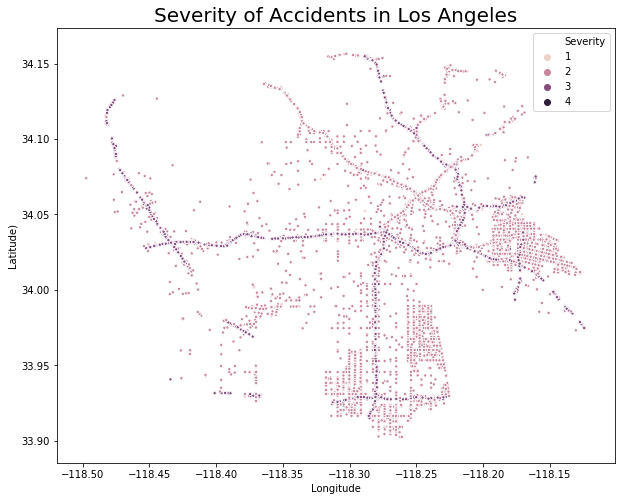

In [41]:
# Here we can see the map of the severity of the accidents in Los Angeles colorcoded with the severity of the accidents
plt.figure(figsize=(10,8))
sns.scatterplot(x='Start_Lng', y='Start_Lat',hue='Severity', data=df.loc[df.City=='Los Angeles'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude)')
plt.title('Severity of Accidents in Los Angeles', fontsize=20)
plt.show()

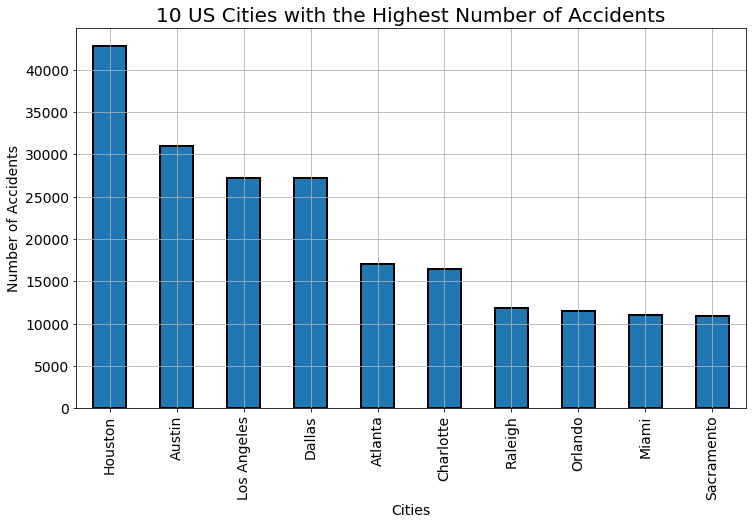

In [42]:
# Now, we will plot a bar plot to visualize to see which cities have the highest number of accidents
top_ten_cities = df['City'].value_counts().head(10)
fig, ax=plt.subplots(figsize=(12,7))
top_ten_cities.plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Cities',fontsize=14)
plt.ylabel('Number of Accidents',fontsize=14)
ax.tick_params(labelsize=14)
plt.title('10 US Cities with the Highest Number of Accidents',fontsize=20)
plt.grid()

Now, we will check which cities have the highest mean of severities. One of the problem is many cities have only one car accident data, and if their accident's severity is 4, their mean will be 4, which will be misleading. We will sort the cities which has more than 100 car accidents to see which cities have a high number of accidents with a high mean severity.

Text(0.5, 1.0, 'Top 10 Cities with Highest Mean Severities')

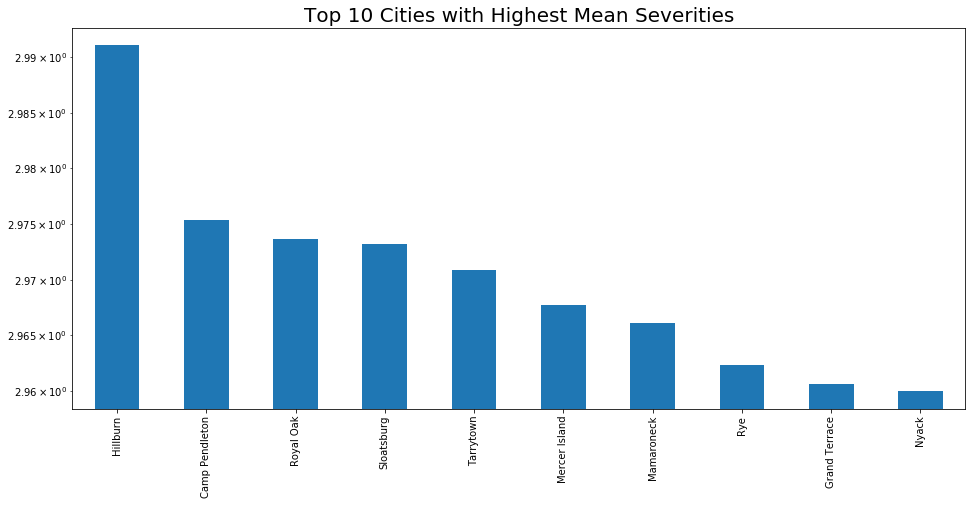

In [43]:
# Sort the cities according to the amount of accidents
city_vals = df['City'].value_counts()
# Choose the cities with more than 100 accidents
big_cities = city_vals.index.values[city_vals>100]
df_top_Severity_City = df.groupby('City').agg({'Severity': 'mean'})

# Create a dictionary with city as a key and mean severity as values
big_city_severities ={}
for city, row in df_top_Severity_City.iterrows():
    if city in big_cities:
        big_city_severities[city] = row['Severity'] 
        
# Convert the dictionary to Pandas Series
x = pd.Series(big_city_severities)

#Plot the graph. We will use logyscale since the mean values are preety close to each other
fig, ax=plt.subplots(figsize=(16,7))
x.sort_values(ascending = False).head(10).plot(kind = 'bar', logy=True)
plt.title("Top 10 Cities with Highest Mean Severities", fontsize=20)

### 3. Severity of Accidents with different weather conditions

The other question is how the amount of accidents are distributed in different weather condions. also, we would like to see how some common weather conditions affect the severity of accidents

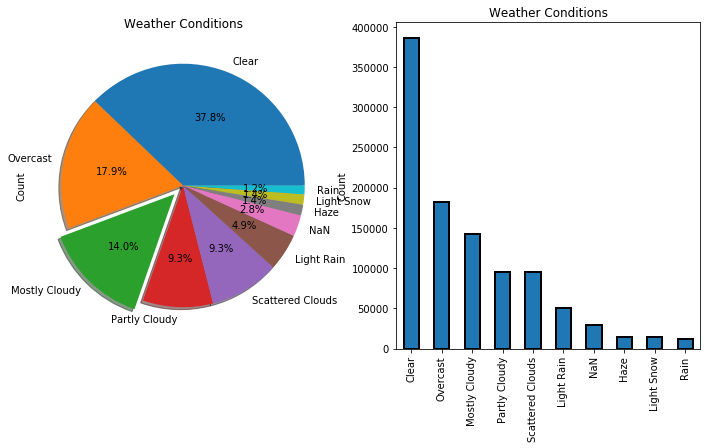

In [44]:
# Top 10 Accident conditions
f,ax=plt.subplots(1,2,figsize=(12,6))
df_top_weather_conditions = df.groupby('Weather_Condition').size().sort_values(ascending=False).iloc[:10]
df_top_weather_conditions.plot.pie(explode=[0,0,0.1,0,0,0,0,0,0,0],ax=ax[0],autopct='%1.1f%%',shadow=True)
ax[0].set_title('Weather Conditions')
ax[0].set_ylabel('Count')
df['Weather_Condition'].value_counts().sort_values(ascending=False).head(10).plot.bar(width=0.5,ax=ax[1],edgecolor='k',align='center',linewidth=2)
ax[1].set_title('Weather Conditions')
ax[1].set_ylabel('Count')
plt.show()

In [45]:
# This table shows the number of accidents for each conditions
pd.DataFrame(df_top_weather_conditions) 

,0
Weather_Condition,
Clear,386111
Overcast,182238
Mostly Cloudy,142518
Partly Cloudy,95093
Scattered Clouds,94684
Light Rain,50388
NaN,28951
Haze,14561
Light Snow,13948


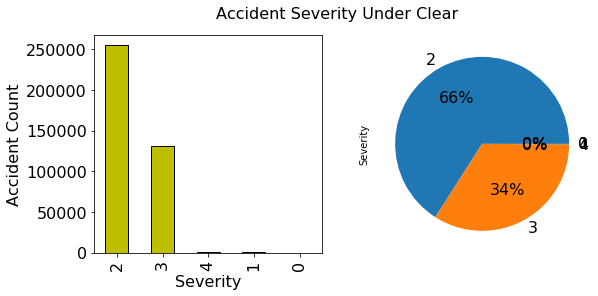

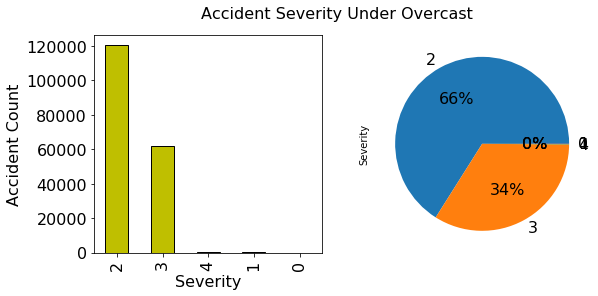

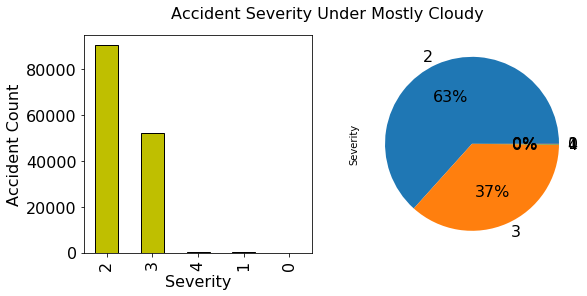

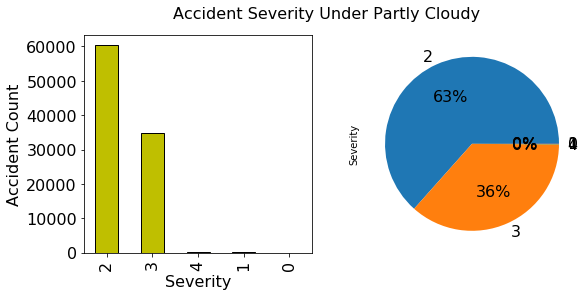

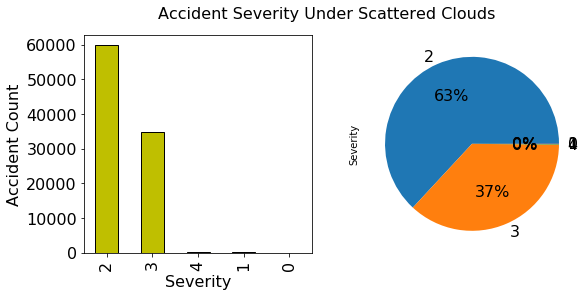

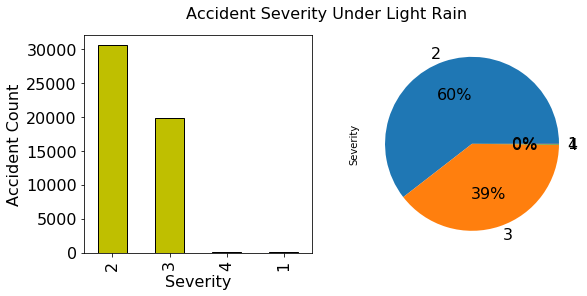

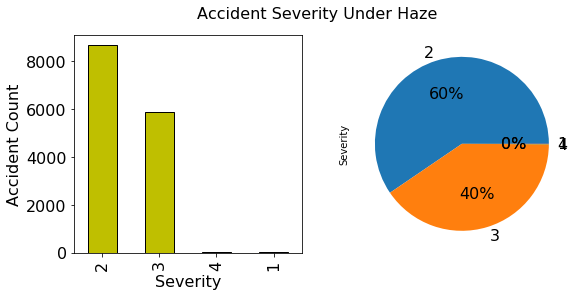

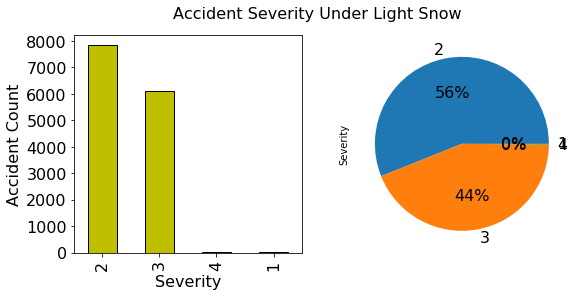

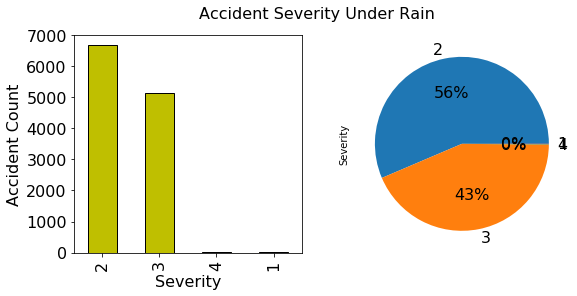

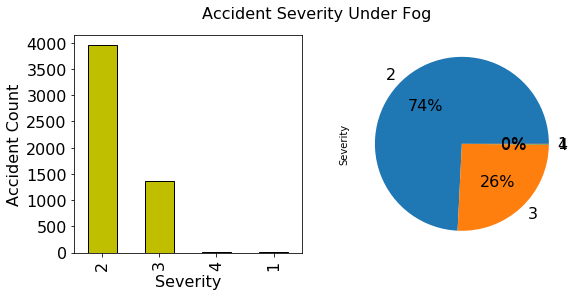

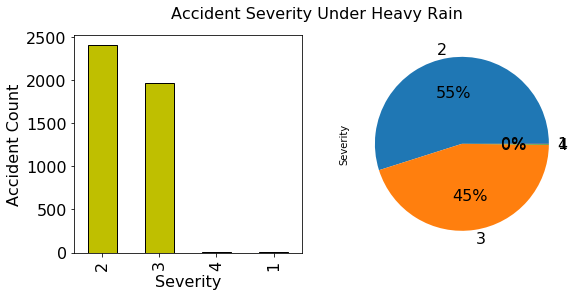

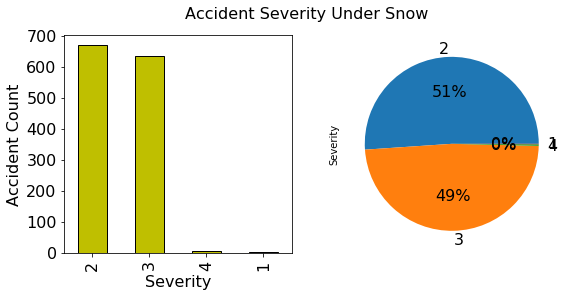

In [59]:
# We will perform a for loop to plot one pieplot and one bar plot for each conditions
for s in ["Clear","Overcast","Mostly Cloudy","Partly Cloudy","Scattered Clouds","Light Rain","Haze","Light Snow","Rain","Fog","Heavy Rain","Snow"]:
    plt.subplots(1,2,figsize=(9,4))
    plt.suptitle('Accident Severity Under ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Weather_Condition"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

These graphs suggest that the waether conditions have a significant impact on severity of an accident.

### 4. Does Side Type Have an Effect on Accidents & Severity? 

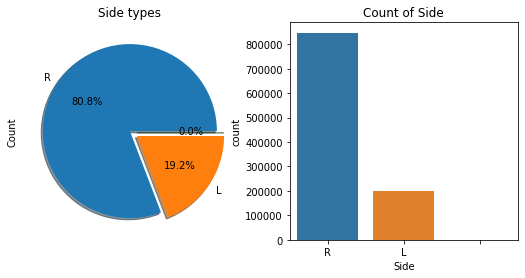

In [47]:
# Percent of Side Types
f,ax=plt.subplots(1,2,figsize=(9,4))
df['Side'].value_counts().plot.pie(explode=[0,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Side types')
ax[0].set_ylabel('Count')
sns.countplot('Side',data=df,ax=ax[1],order=df['Side'].value_counts().index)
ax[1].set_title('Count of Side')
plt.show()

This graph suggest that more accidents happens on right side. However, does the side have an affect on the severity?

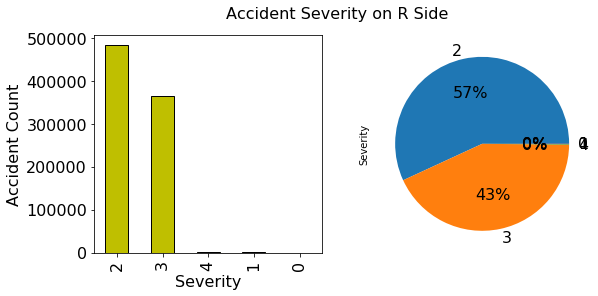

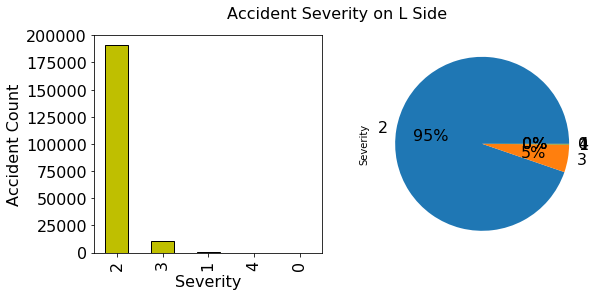

In [60]:
for s in ["R","L"]:
    plt.subplots(1,2,figsize=(9,4))
    plt.suptitle('Accident Severity on ' + s+" Side",fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["Side"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["Side"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

This graph suggests that the Left Side accidents are more likely to be less severe.

### 5. Proximity to Traffic Objects

In this dataset, there are some boolean values that determines whether the accident happened near a traffic signal, stop sign, etc. We will See how proximity to an object affects the accident number and severity

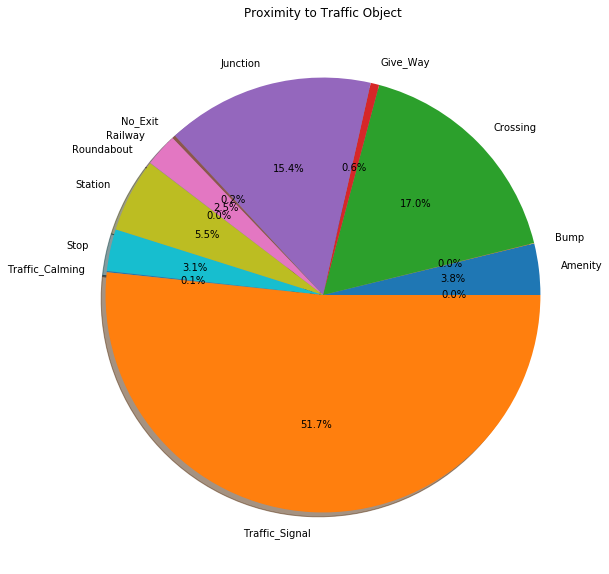

In [49]:
# Firstly we will identify columns with boolean datatypes
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
bools = df[bool_cols].sum(axis=0)

# Now we will plot a pieplot.
bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

One problem about this pie chart is, some of the accidents may have more than one boolean values.

In [50]:
not_one_hot = df[bool_cols][df[bool_cols].sum(axis=1) > 1]
print('There are {} non one hot metadata rows, which are {:.1f}% of the data'.format(len(not_one_hot),100*len(not_one_hot)/len(df)))

There are 70064 non one hot metadata rows, which are 6.7% of the data


<Figure size 432x288 with 0 Axes>

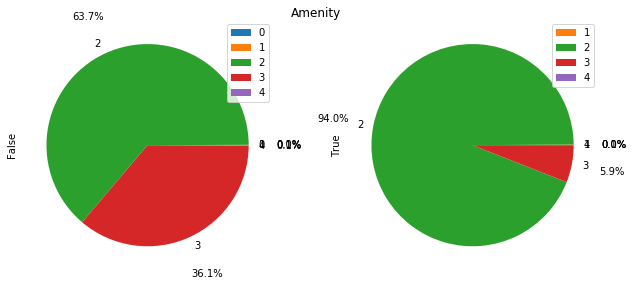

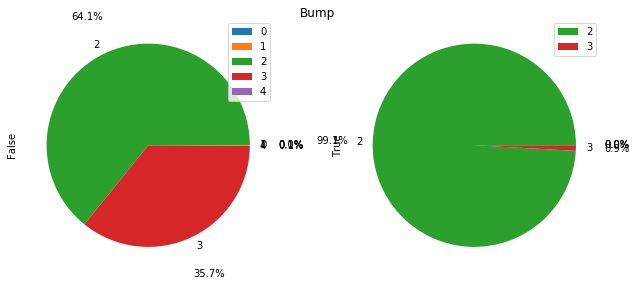

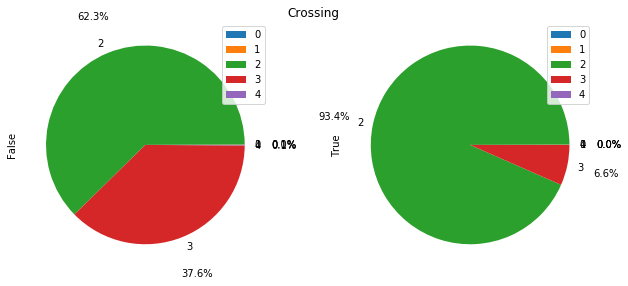

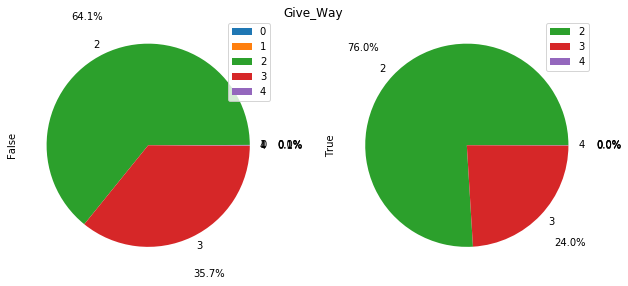

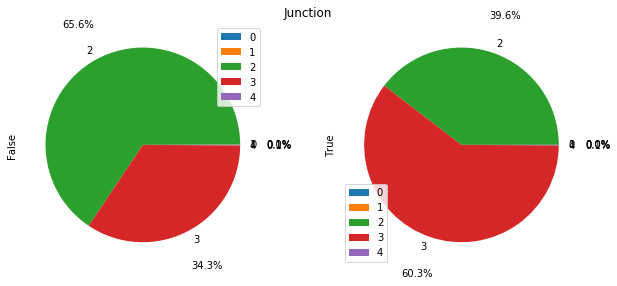

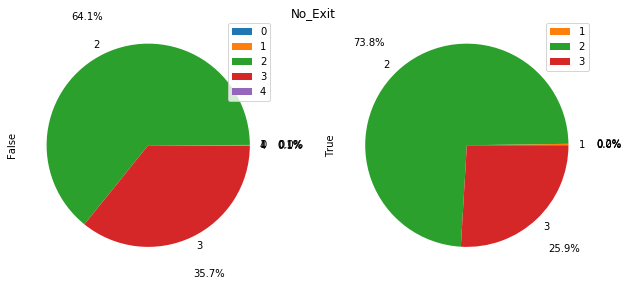

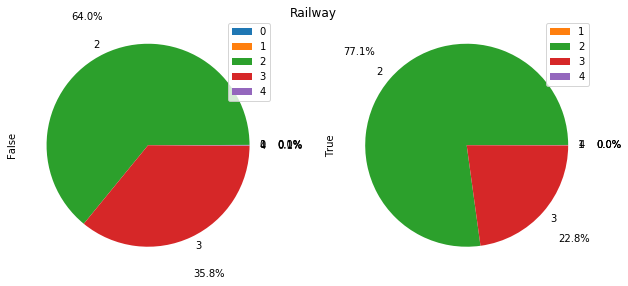

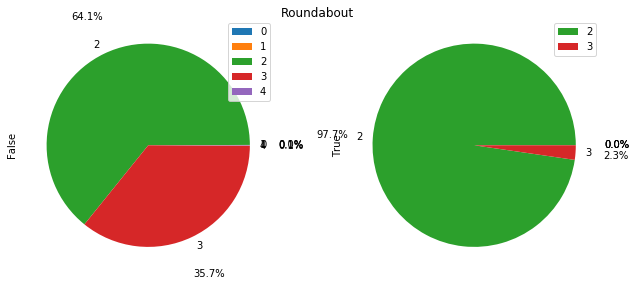

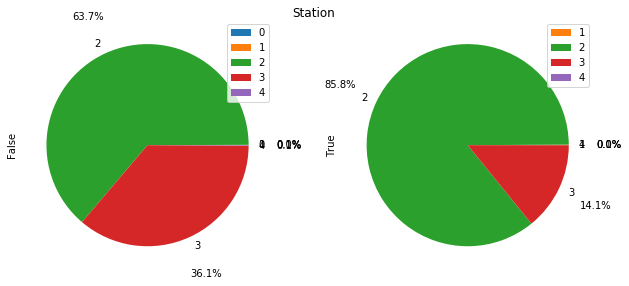

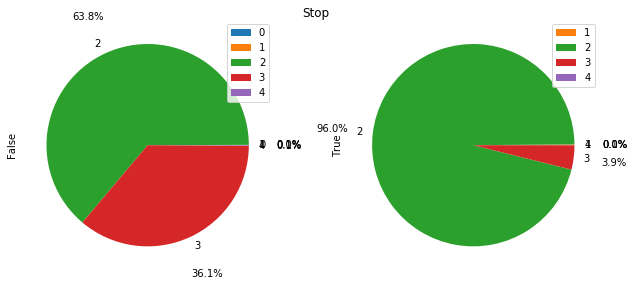

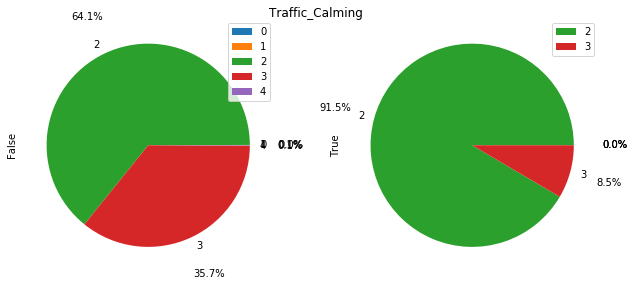

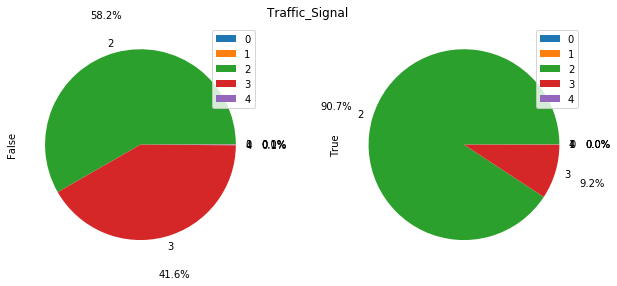

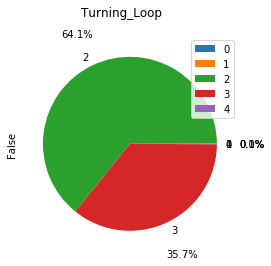

In [51]:
# Now we will check how the distribution of severity differs for True and False values for each booleans.
df_list=[]
def  bool_severity(col):
    df_bool = df.groupby([col,'Severity'])['ID'].count()
    df_bool = df_bool.unstack(col)
    df_list.append(df_bool)
for col in bool_cols:
    bool_severity(col)
for i in range(len(bool_cols)):
    plt.tight_layout()
    df_list[i].plot(kind='pie',subplots=True,autopct='%.1f%%',pctdistance=1.4,figsize=(9,4),title = bool_cols[i])

### 6. How the Number of Accidents & Severities are Associated with Days of Week?

In [52]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format="%Y/%m/%d %H:%M:%S")
df['DayOfWeekNum'] = df['Start_Time'].dt.dayofweek
df['DayOfWeek'] = df['Start_Time'].dt.weekday_name
df['MonthDayNum'] = df['Start_Time'].dt.day
df['HourOfDay'] = df['Start_Time'].dt.hour

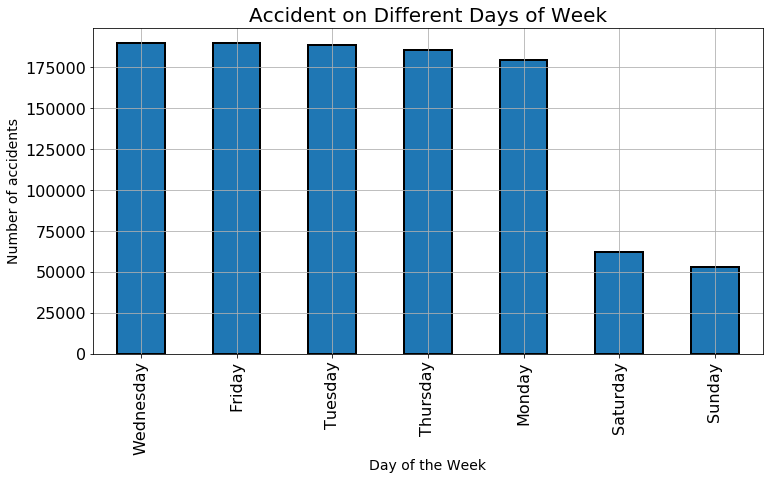

In [53]:
fig, ax=plt.subplots(figsize=(12,6))
df['DayOfWeek'].value_counts(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('Day of the Week',fontsize=14)
plt.ylabel('Number of accidents',fontsize=14)
ax.tick_params(labelsize=16)
plt.title('Accident on Different Days of Week',fontsize=20)
plt.grid()
plt.show()

The graph above suggest that the number of accidents on weekdays are pretty close, but there are significantly less accidents on the weekends.

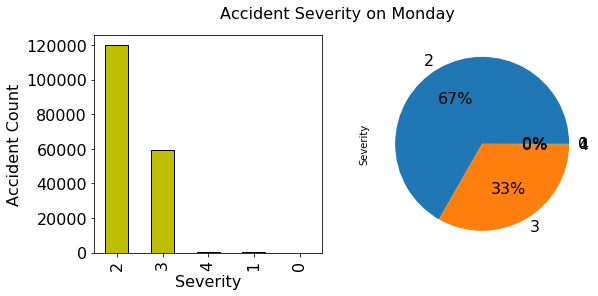

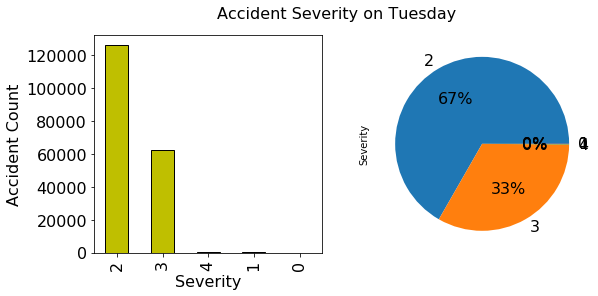

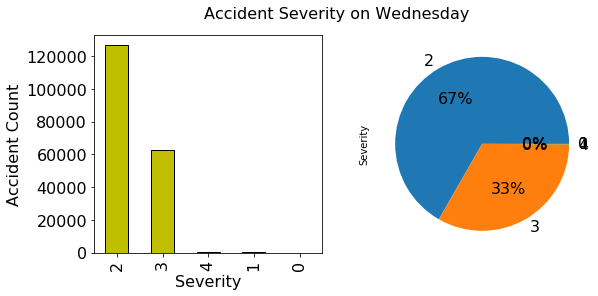

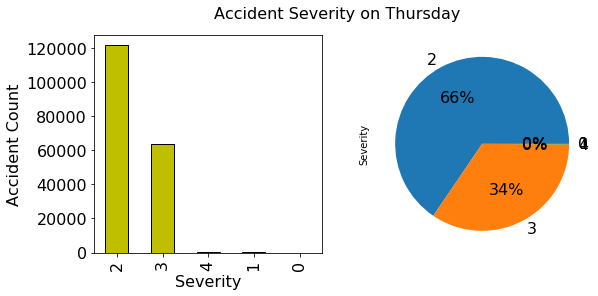

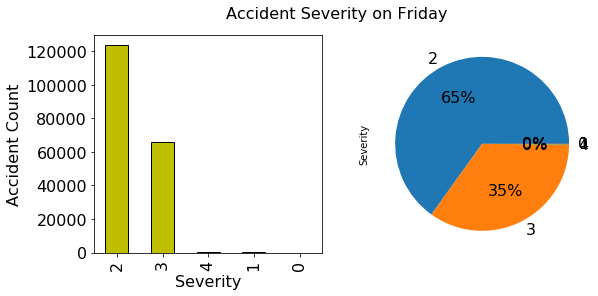

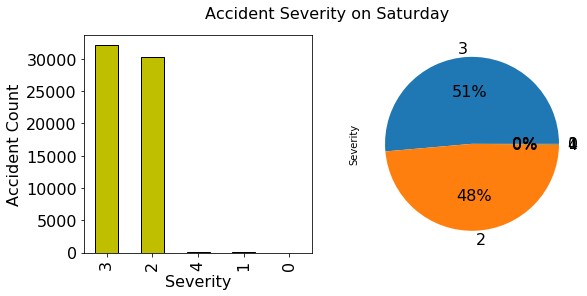

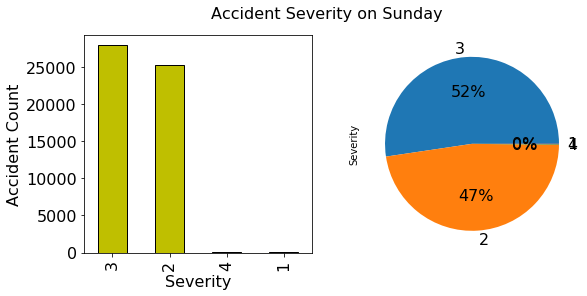

In [54]:
# We will check the severity distribution of the accidents on Day Of Weeks
for s in ["Monday","Tuesday","Wednesday", "Thursday","Friday","Saturday","Sunday"]:
    plt.subplots(1,2,figsize=(9,4))
    plt.suptitle('Accident Severity on ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["DayOfWeek"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["DayOfWeek"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

According to the graphs, the accident severity changes between the weekdays slightly. However, the severity distribution on weekends are significantly different than the weekdays. We can perform similar analysis for other cyclical variables as months, hour, etc.

In [94]:
weekday_bool = []
for col in df["DayOfWeek"]:
    if col == ['Saturday']:
        weekday_bool.append(False)
    else:
        weekday_bool.append(True)
df['weekday'] = pd.DataFrame(weekday_bool)

In [95]:
df['weekday'].head()

0    True
1    True
2    True
3    True
4    True
Name: weekday, dtype: bool

In [96]:
df['weekday'].value_counts()

True    1048575
Name: weekday, dtype: int64

In [ ]:
for s in ['True','False']:
    plt.subplots(1,2,figsize=(9,4))
    plt.suptitle('Accident Severity on ' + s,fontsize=16)
    plt.subplot(1,2,1)
    df.loc[df["weekday"] == s]['Severity'].value_counts().plot.bar(width=0.5,color='y',edgecolor='k',align='center',linewidth=1)
    plt.xlabel('Severity',fontsize=16)
    plt.ylabel('Accident Count',fontsize=16)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.subplot(1,2,2)
    df.loc[df["weekday"] == s]['Severity'].value_counts().plot.pie(autopct='%1.0f%%',fontsize=16)

In [ ]:
# Firstly we will identify columns with boolean datatypes
bool_cols = [col for col in df.columns if df[col].dtype ==np.dtype('bool')]
bools = df[bool_cols].sum(axis=0)

# Now we will plot a pieplot.
bools.plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.ylabel('')
plt.title('Proximity to Traffic Object');

In [ ]:
df_list=[]
def  bool_severity(col):
    df_bool = df.groupby([col,'Severity'])['ID'].count()
    df_bool = df_bool.unstack(col)
    df_list.append(df_bool)
for col in bool_cols:
    bool_severity(col)
for i in range(len(bool_cols)):
    plt.tight_layout()
    df_list[i].plot(kind='pie',subplots=True,autopct='%.1f%%',pctdistance=1.4,figsize=(9,4),title = bool_cols[i])a

In [74]:
df_weekday = []
def  weekday_severity(col):
    weekday_bool = df.groupby([col,'Severity'])['weekday'].count()
    weekday_bool = weekday_bool.unstack(col)
    df_weekday.append(weekday_bool)
for col in df['weekday']:
    bool_severity(col)
for i in range(len(df['weekday'])):
    plt.tight_layout()
    df_weekday[i].plot(kind='pie',subplots=True,autopct='%.1f%%',pctdistance=1.4,figsize=(9,4),title = bool_cols[i])

KeyError: 0.0

### 7. Visualization of Severity vs. Contnious Numeric Variables

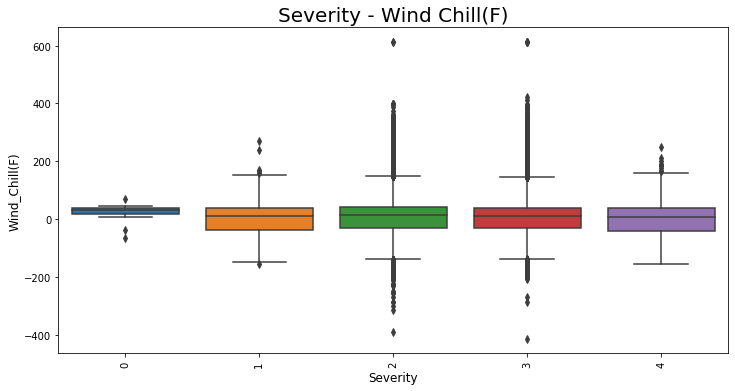

In [56]:
# Sketch a Boxplot for Severity vs. Wind Chill(F)
plt.figure(figsize=(12,6))
sns.boxplot(x="Severity", y="Wind_Chill(F)", data=df)
plt.ylabel('Wind_Chill(F)', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Severity - Wind Chill(F)",fontsize=20)
plt.show()

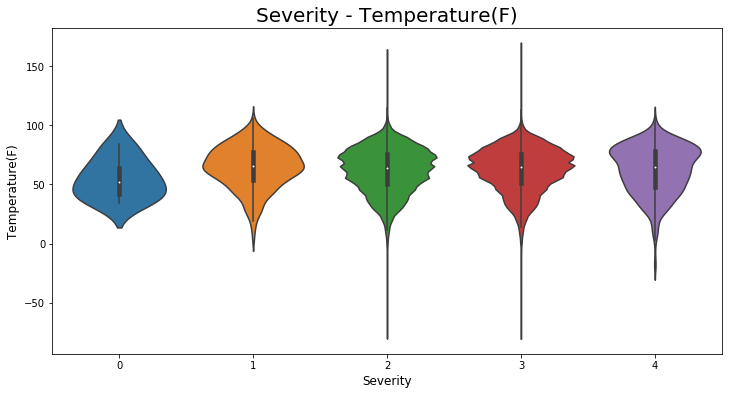

In [57]:
# Sketch a Violin Plot for Severity vs. Temperature(F)
plt.figure(figsize=(12,6))
sns.violinplot(x='Severity', y='Temperature(F)', data=df)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Temperature(F)', fontsize=12)
plt.title("Severity - Temperature(F)",fontsize=20)
plt.show()

In the following graph, we will observe how the mean severity changes with respect to some continuous variables:

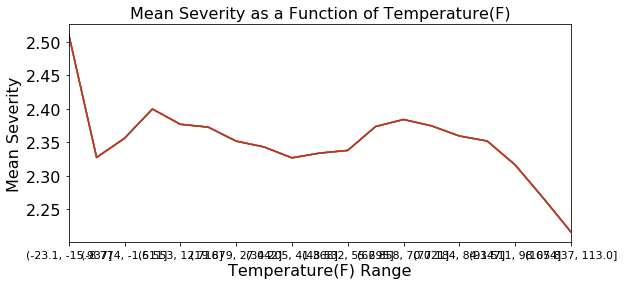

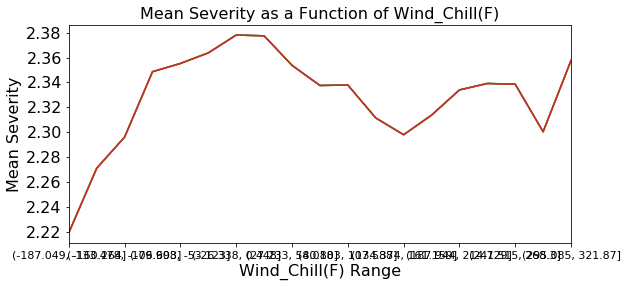

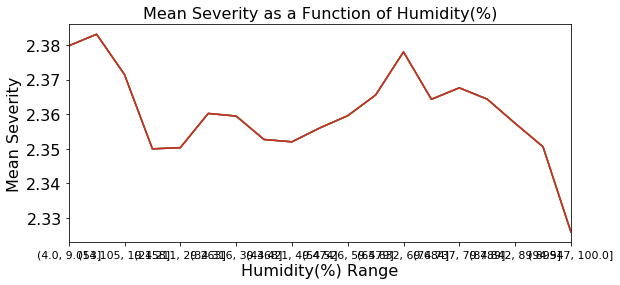

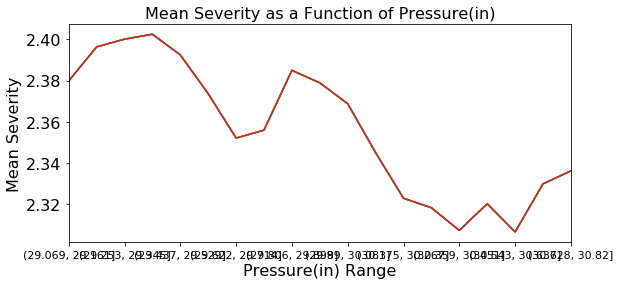

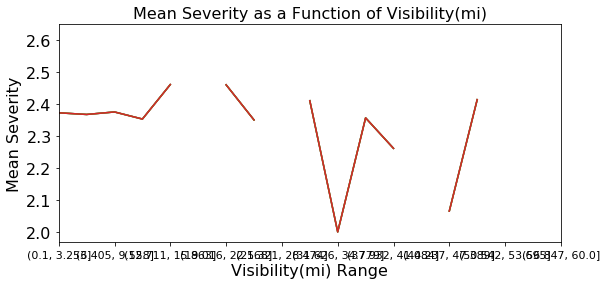

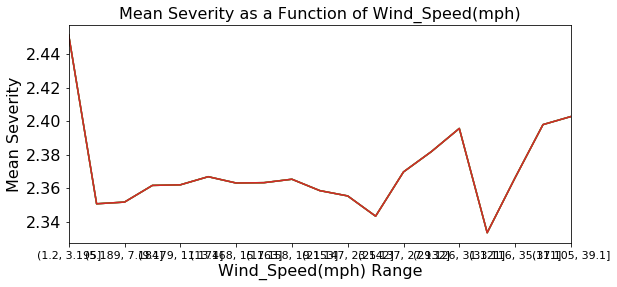

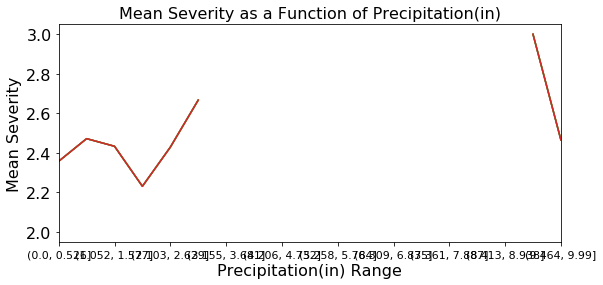

In [58]:
factors = ['Temperature(F)','Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for factor in factors:
    # remove some of the extreme values
    factorMin = df[factor].quantile(q=0.0001)
    factorMax = df[factor].quantile(q=0.9999)
    # print df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).count()
    plt.subplots(figsize=(9,4))
    for s in np.arange(1,5):
        df["Severity"].groupby(pd.cut(df[factor], np.linspace(factorMin,factorMax,num=20))).mean().plot()
        plt.title("Mean Severity as a Function of " + factor, fontsize=16)
        plt.xlabel(factor + " Range", fontsize=16)
        plt.ylabel("Mean Severity", fontsize=16)
        plt.xticks(fontsize=11)
        plt.yticks(fontsize=16)

### 8. Perform a t-test 

We can perform t-test to see if the severity changes significantly between two groups. However, the dataset is very large with more than 1 million values, which makes the standard error very small. We expect to get very large t-values. Just to see the significance, I will perform a

In [167]:
# We will import the libraries
from scipy import stats
from scipy.stats import ttest_ind

In [168]:
stats.ttest_ind(df['Severity'][df['Junction'].astype(bool)].dropna(), df['Severity'][~df['Junction'].astype(bool)].dropna(), equal_var=False)

Ttest_indResult(statistic=123.45381748295537, pvalue=0.0)

In [96]:
# We will check some of the objects that will make a category
df.Weather_Condition.value_counts()

Clear                                  386111
Overcast                               182238
Mostly Cloudy                          142518
Partly Cloudy                           95093
Scattered Clouds                        94684
Light Rain                              50388
NaN                                     28951
Haze                                    14561
Light Snow                              13948
Rain                                    11829
Fog                                      5320
Heavy Rain                               4377
Light Drizzle                            3853
Light Thunderstorms and Rain             2356
Thunderstorm                             2125
Snow                                     1308
Smoke                                    1262
Heavy Thunderstorms and Rain             1108
Thunderstorms and Rain                   1020
Mist                                      924
Patches of Fog                            840
Light Freezing Rain               

In [97]:
# This can be a value that we can use dummy variables to categorize each condition
df = pd.get_dummies(df, columns=['Weather_Condition'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 127 entries, ID to Weather_Condition_Widespread Dust
dtypes: bool(13), datetime64[ns](2), float64(11), int32(20), int64(5), object(20), uint8(56)
memory usage: 453.0+ MB


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 127 entries, ID to Weather_Condition_Widespread Dust
dtypes: bool(13), datetime64[ns](2), float64(11), int32(20), int64(5), object(20), uint8(56)
memory usage: 453.0+ MB


In [99]:
df = pd.get_dummies(df, columns=['State'])

In [100]:
df = pd.get_dummies(df, columns=['Month','Weekday'])

In [101]:
# Now, we can find the descriptions of the numerical values
df.describe()

,TMC,Severity,Start_Lat,Start_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Month_Nov,Month_Oct,Month_Sep,Weekday_Fri,Weekday_Mon,Weekday_Sat,Weekday_Sun,Weekday_Thu,Weekday_Tue,Weekday_Wed
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.077632e+02,2.358323e+00,3.611783e+01,-9.517610e+01,1.476137e-01,5.267198e+03,6.199550e+01,6.959707e+00,6.680177e+01,3.003558e+01,...,1.056224e-01,1.032477e-01,9.371766e-02,1.808264e-01,1.710846e-01,5.951029e-02,5.075078e-02,1.769010e-01,1.800749e-01,1.808521e-01
std,1.968127e+01,4.824762e-01,4.895696e+00,1.720663e+01,1.361161e+00,7.388160e+03,1.878450e+01,5.648070e+01,2.156002e+01,2.188615e-01,...,3.073539e-01,3.042823e-01,2.914357e-01,3.848744e-01,3.765830e-01,2.365774e-01,2.194885e-01,3.815851e-01,3.842500e-01,3.848958e-01
min,2.000000e+02,0.000000e+00,2.457027e+01,-1.244931e+02,0.000000e+00,1.000000e+00,-7.780000e+01,-4.132350e+02,4.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.010000e+02,2.000000e+00,3.300991e+01,-1.173272e+02,0.000000e+00,1.217526e+03,5.000000e+01,-3.165051e+01,5.200000e+01,2.992000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.010000e+02,2.000000e+00,3.541019e+01,-9.021603e+01,0.000000e+00,3.269000e+03,6.400000e+01,1.311565e+01,6.800000e+01,3.003000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.010000e+02,3.000000e+00,4.009613e+01,-8.093151e+01,1.000000e-02,7.103000e+03,7.590000e+01,3.930000e+01,8.500000e+01,3.014000e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.060000e+02,4.000000e+00,4.900076e+01,-6.865836e+01,3.336300e+02,8.519090e+05,1.670000e+02,6.121424e+02,1.000000e+02,3.304000e+01,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


We want to perform our first linear model to see the strenght of our model

In [102]:
from sklearn.linear_model import LinearRegression

In [103]:
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# Now, we will define target and feature variables. Since this project is trying to generate a model to predict the severity of accidents, we will use "Severrity" as targetr variable
target_names = ['Severity']
feature_names = [c for c in df.columns if c not in target_names and df[c].dtype != object and not c.endswith('Time')]

In [105]:
X = df[feature_names]
y = df[target_names]
X.shape

(1048575, 172)

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 172 entries, TMC to Weekday_Wed
dtypes: bool(13), float64(11), int32(20), int64(4), uint8(124)
memory usage: 337.0 MB


In [107]:
missing_values_X = X.isnull().sum().sort_values(ascending=False)
missing_values_X

Weekday_Wed                             0
Weather_Condition_Funnel Cloud          0
Weather_Condition_Heavy Rain Showers    0
Weather_Condition_Heavy Rain            0
Weather_Condition_Heavy Ice Pellets     0
                                       ..
State_GA                                0
State_FL                                0
State_DE                                0
State_DC                                0
TMC                                     0
Length: 172, dtype: int64

In [108]:
lr.fit(X, y)
lr.score(X,y)

0.3261133037139825

Nice try, now I will save this DataFrame with dummies to a csv

In [ ]:
df.to_csv('US_Accidents_with_dummies.csv')